In [ ]:
import pandas as pd
import calendar
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import files

# Upload the file
uploaded = files.upload()

Saving cleaned_working_dataset.csv to cleaned_working_dataset.csv


In [ ]:
df = pd.read_csv('cleaned_working_dataset.csv')

In [ ]:
# Convert release_date to datetime
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
#Converts the release_date column from strings to datetime objects using Pandas' to_datetime function

# Drop rows where release_date is NaT
df = df.dropna(subset=['release_date'])

# Data Cleaning: Converts inconsistent date formats to a standard datetime format and removes invalid dates.
#Creates additional columns that can be used to analyze trends or patterns in movie releases
df['release_year'] = df['release_date'].dt.year
df['release_month'] = df['release_date'].dt.month
df['release_dayofweek'] = df['release_date'].dt.dayofweek


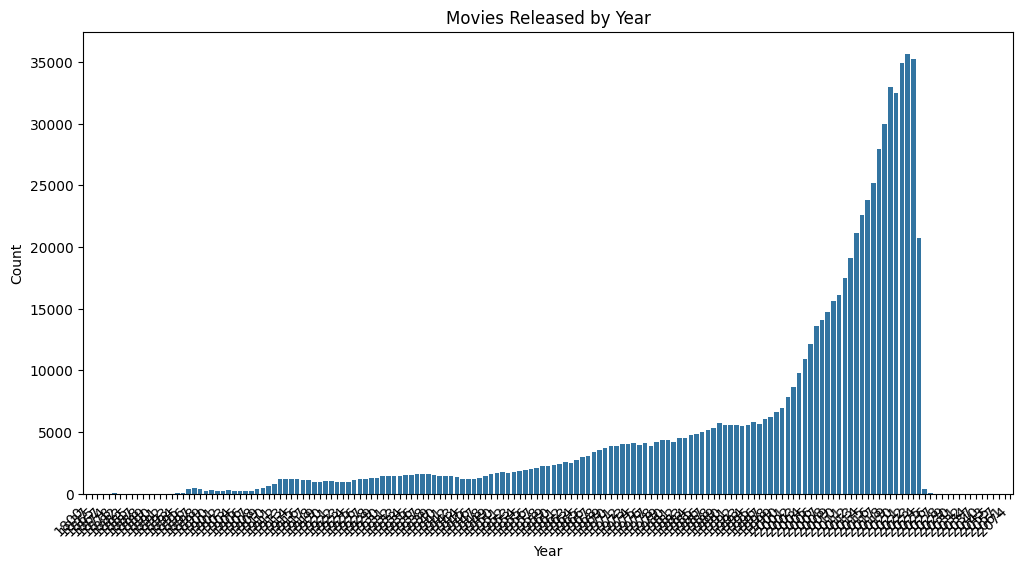

In [ ]:
plt.figure(figsize=(12, 6)) #initializes a new Matplotlib figure with a custom size of 12 inches wide and 6 inches tall.
sns.countplot(data=df, x='release_year', order=sorted(df['release_year'].dropna().unique())) #creates a bar plot using Seaborn to show the count of movies for each year (release_year) in the dataset (df).
plt.xticks(rotation=45, ha='right')  # Rotate 45 degrees and align to the right
plt.title('Movies Released by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

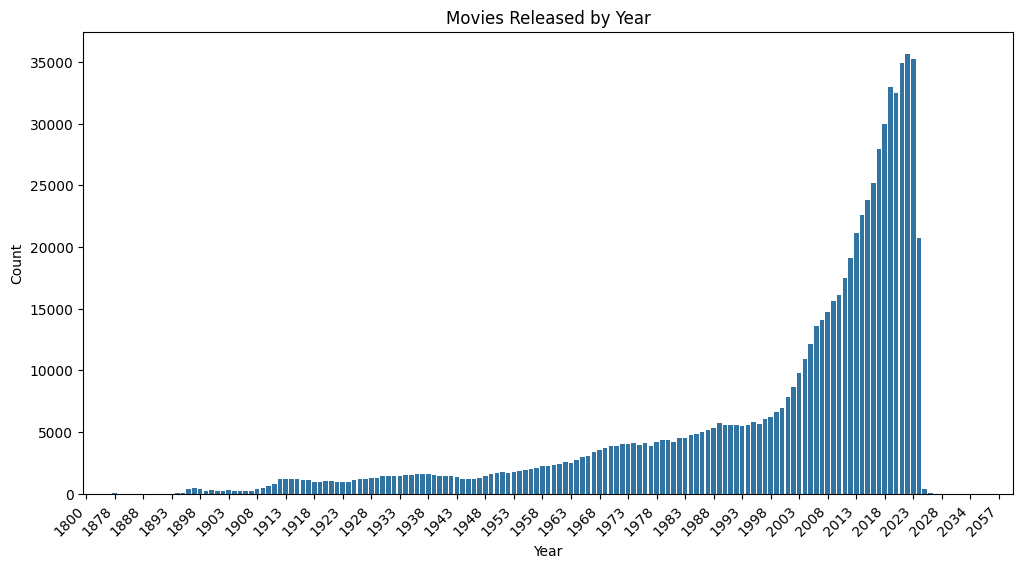

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='release_year', order=sorted(df['release_year'].dropna().unique()))
plt.xticks(ticks=plt.gca().get_xticks()[::5], rotation=45, ha='right')  # Show every 5th year
plt.title('Movies Released by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

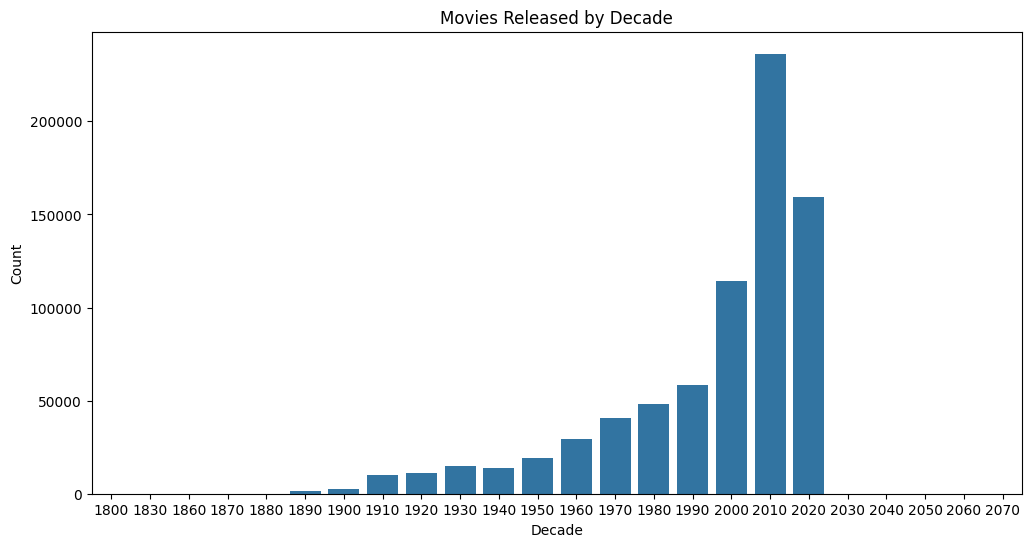

In [ ]:
# Group by decades
df['release_decade'] = (df['release_year'] // 10) * 10

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='release_decade', order=sorted(df['release_decade'].dropna().unique()))
plt.title('Movies Released by Decade')
plt.xlabel('Decade')
plt.ylabel('Count')
plt.show()


These show the number of movies that were released based on year. I attempted to create the graph a few times because the first graph didnt show the years clearly. So in order to make it readable i categorized the years to decades.

Also the count axis shows the total number of movies released in each year.

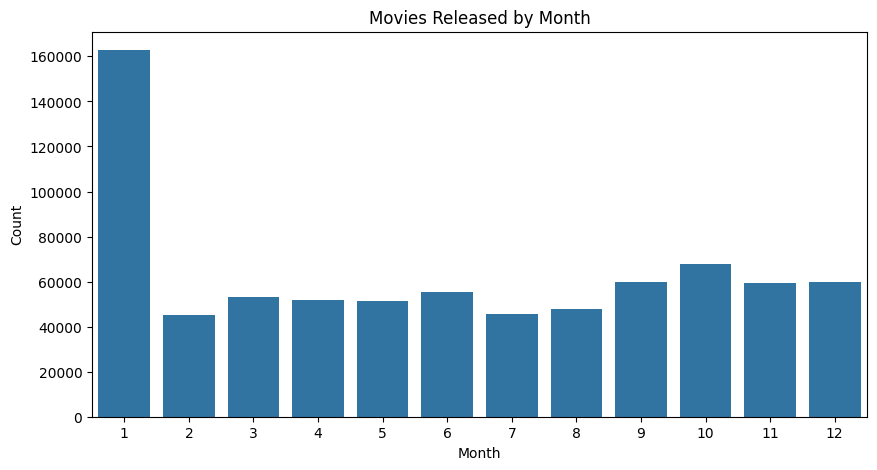

In [ ]:
# Plot movies released by month
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='release_month', order=range(1, 13))
#The release_month column contains the months when movies were released.
#The count is the number of movies released in each month.
#The bar plot shows these counts visually, with one bar for each month.


plt.title('Movies Released by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()


number of movie releases for each month across all years in the dataset. doesnt focus on one year.

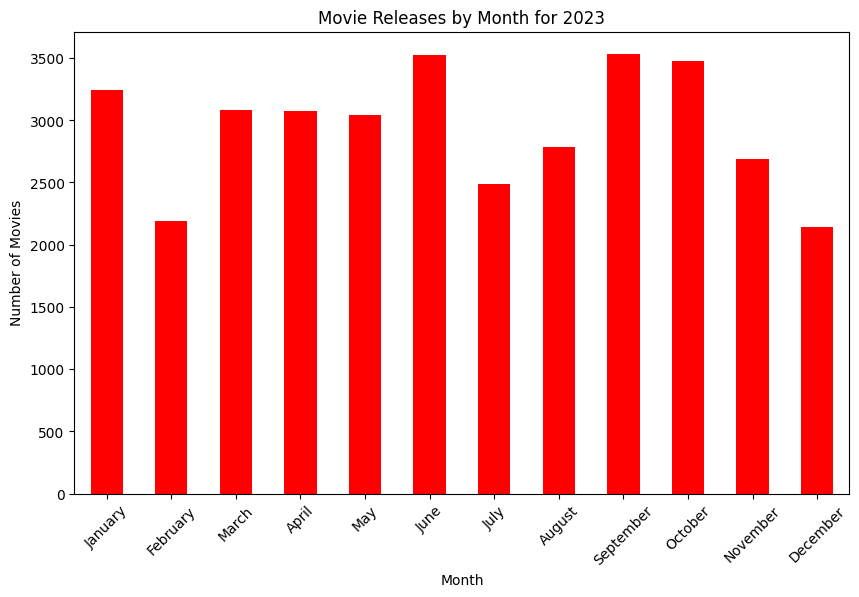

In [ ]:
specific_year = 2023  # Replace with the desired year
df_specific_year = df[df['release_date'].dt.year == specific_year]

monthly_releases = df_specific_year.groupby(df_specific_year['release_date'].dt.month).size()
monthly_releases.plot(kind='bar', figsize=(10, 6), color='red')

plt.title(f"Movie Releases by Month for {specific_year}")
plt.ylabel("Number of Movies")
plt.xlabel("Month")
plt.xticks(range(0, 12), calendar.month_name[1:13], rotation=45)
plt.show()



this focuses on the movie releases for each month during year 2023. you can adjust the year.

questions to consider:
Are more movies being released in recent years compared to the past?
Is there a specific month when most movies are released?

answers based on the analysis: Yes there are definietly more movies being released over the years compared to back then. From the graph, I notice that the most movies were released in 2010. 2020 also had more releases but less than 2010.
Some impacts that affect the release of movies could be:
- increase of streaming platforms such as Netflix and Hulu created a huge demand for content which resulted in more films being produced
- advancmenet of technology made it more accessible for filmmaking. For example, advances in digital cameras, editing software, and production tools made filmmaking more accessible and cost-effective.


Relation to revenue:
- With more movies being released each year, there is a competition for consumer attention and spending. People have a bunch of options now which means audiences have more choices and may not spend as much on each movie. Can lead to weak box office revenue. (the total amount of money generated from ticket sales)

- As movie production increases, a shift toward streaming platforms increases. This shift has the potential to decrease box office revenue since audiences will nown opt for streaming instead of attending theaters.